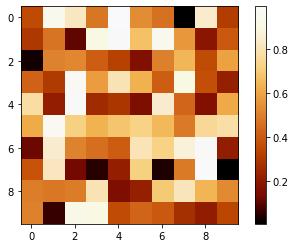

In [27]:

##### imports ######
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append("../src")
import converter as conv


##### code #######


### path of the .lut file, here one example provided in the example folder
fname  = 'Julio.lut'

### convert the colormap

cmap_lut = conv.cmap_fromLut(fname)

# Test the converted colormap
plt.figure()
data = np.random.rand(10, 10)  # Example data
plt.imshow(data, cmap=cmap_lut)
plt.colorbar()
plt.show()

In [26]:
##### imports ######
import matplotlib.pyplot as plt
import sys
import matplotlib
sys.path.append("src")
# import converter as conv
import numpy as np

##### code #######

def export_colormap(colormap, filename):
    cmaplist = [colormap(i) for i in range(0,colormap.N,4)]
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, colormap.N/4)

    with open(filename, 'w') as file:
        file.write("WSxM file copyright UAM\n")
        file.write("New Format Palette. 2001\n")
        file.write("Image header size: 1143\n\n")
        
        def write_color_points(color_name, color_points):
            file.write(f"[{color_name} Info]\n")
            for i, point in enumerate(color_points):
                file.write(f"    Control Point {i}: ({int(point[0]*255)} , {255-int(point[1]*255)})\n")
            file.write(f"    Number of Control Points: {len(color_points)}\n\n")
        
        write_color_points("Blue", colormap._segmentdata['blue'])
        write_color_points("Green", colormap._segmentdata['green'])
        write_color_points("Red", colormap._segmentdata['red'])
        
        file.write("[Palette Generation Settings]\n")
        file.write("    Derivate Mode for the last blue Point: Automatic\n")
        file.write("    Derivate Mode for the last green Point: Automatic\n")
        file.write("    Derivate Mode for the last red Point: Automatic\n")
        file.write("    Is there a particular palette index colored?: No\n")
        file.write("    Smooth Blue: No\n")
        file.write("    Smooth Green: No\n")
        file.write("    Smooth Red: No\n\n")
        
        file.write("[Header end]")
    return colormap
# colormap from matplotlib
cmap = plt.cm.viridis

# export the map in .lut format

cmap_exp = export_colormap(cmap, 'viridis.lut')
